# CS:GO Round Winner Classification 

**The dataset consists of round snapshots from about 700 demos from high level tournament play in 2019 and 2020. Warmup rounds and restarts have been filtered, and for the remaining live rounds a round snapshot has been recorded every 20 seconds until the round is decided. Following its initial publication, It has been pre-processed and flattened to improve readability and make it easier for algorithms to process. The total number of snapshots is 122411. Snapshots are i.i.d and should be treated as individual data points, not as part of a match.**

## Import Preliminary Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [9]:
df = pd.read_csv("csgo_round_snapshots - Harshit Trivedi.csv")

In [10]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


## Kaggle link

https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification

## General Observation

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

## Statistical summary

In [16]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
time_left,122410.0,98.0,54.0,0.0,55.0,95.0,167.0,175.0
ct_score,122410.0,7.0,5.0,0.0,3.0,6.0,10.0,32.0
t_score,122410.0,7.0,5.0,0.0,3.0,6.0,10.0,33.0
ct_health,122410.0,412.0,132.0,0.0,350.0,500.0,500.0,500.0
t_health,122410.0,403.0,140.0,0.0,322.0,500.0,500.0,600.0
...,...,...,...,...,...,...,...,...
t_grenade_incendiarygrenade,122410.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
ct_grenade_molotovgrenade,122410.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
t_grenade_molotovgrenade,122410.0,1.0,2.0,0.0,0.0,1.0,2.0,5.0
ct_grenade_decoygrenade,122410.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


## Exploratory Data Analysis

### Null Values

In [19]:
df.isnull().sum().sum()

0

**No null values present**

### Target Class Balance

In [22]:
df["round_winner"].value_counts()

round_winner
T     62406
CT    60004
Name: count, dtype: int64

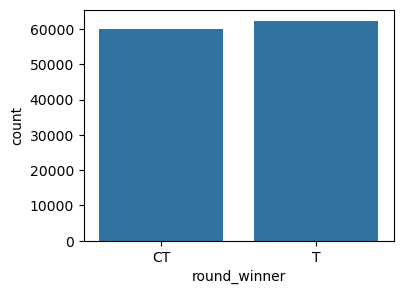

In [23]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["round_winner"])
plt.show()

**The target class distribution has to be almost equal. Here, in this case, we have almost equal distribution for T and CT. If not, the predictive algorithm can result in bias towards one output class. We have to use SMOTE to create a balance between the output classes in such a case** 

### Unique Values

In [26]:
for column in df:
    print(f"{column} - ({len(df[column].unique())}) : {df[column].unique()}")
    print("\n")

time_left - (10782) : [175.   156.03  96.03 ...  79.26  53.38   0.24]


ct_score - (33) : [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]


t_score - (34) : [ 0.  1.  2.  3.  4. 11. 12. 13. 14. 15.  5.  6.  8.  9. 10.  7. 16. 17.
 18. 19. 20. 21. 23. 22. 24. 26. 27. 28. 29. 30. 25. 31. 32. 33.]


map - (8) : ['de_dust2' 'de_mirage' 'de_nuke' 'de_inferno' 'de_overpass' 'de_vertigo'
 'de_train' 'de_cache']


bomb_planted - (2) : [False  True]


ct_health - (501) : [500. 391. 295. 249. 300. 116. 100. 431. 404. 379. 200. 399. 163.  67.
 400. 298. 307. 473. 454. 371. 338. 476. 376. 432. 389. 109. 320. 184.
  80. 497.  28. 483. 283. 183. 180. 201. 395. 471. 171. 112. 282. 103.
  13. 478. 207. 344. 279. 189. 322. 452.  10.  36. 321. 315. 408. 108.
 257. 416. 288. 263. 188. 491. 281. 181. 153.  71. 429. 229. 129.  29.
 270. 104. 174. 273. 481. 252.  81. 139. 299. 492. 159. 287. 479. 179.
 318.  99. 243. 242.

**In the above output we have observed only one unique value for certain columns. These columns are of no importance to us. These can be dropped**

### Dropping the redundant columns

In [29]:
col = []
for column in df:
    if df[column].nunique()==1:
        col.append(column)

In [30]:
col

['ct_weapon_bizon',
 'ct_weapon_g3sg1',
 't_weapon_m249',
 'ct_weapon_negev',
 'ct_weapon_r8revolver',
 'ct_weapon_sawedoff']

In [31]:
df.drop(columns = ['ct_weapon_bizon',
 'ct_weapon_g3sg1',
 't_weapon_m249',
 'ct_weapon_negev',
 'ct_weapon_r8revolver',
 'ct_weapon_sawedoff'], inplace=True)

In [32]:
df.shape

(122410, 91)

**6 columns have been dropeed. The features have reduced from 97 to 91** 

### Feature: time_left
**Time left in the round at the time of snapshot**

In [35]:
df["time_left"].describe()

count    122410.000000
mean         97.886922
std          54.465238
min           0.010000
25%          54.920000
50%          94.910000
75%         166.917500
max         175.000000
Name: time_left, dtype: float64

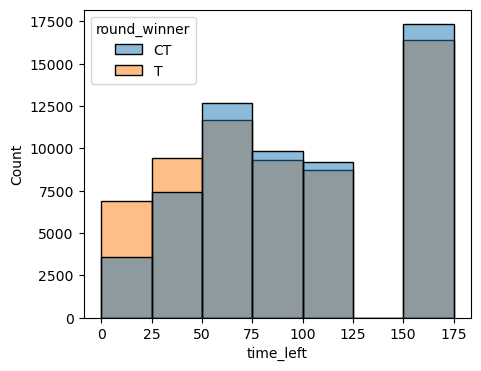

In [36]:
plt.figure(figsize=(5,4))
sns.histplot(x=df["time_left"], bins=7, hue="round_winner", data=df)
plt.show()

In [37]:
ct_win_25 = df["round_winner"][(df["time_left"] <=25) & (df["round_winner"]=="CT")].count()

In [38]:
t_win_25 = df["round_winner"][(df["time_left"] <=25) & (df["round_winner"]=="T")].count()

In [39]:
print(f"CT wins when t_left<=25 : {ct_win_25}")
print(f"T wins when t_left<=25: {t_win_25}")

CT wins when t_left<=25 : 3574
T wins when t_left<=25: 6901


**We can observe from the histogram and the above calculations, if time_left<=25 then the probability of T win is twice as likely as CT win**

**For time_left range of 25 to 50, also favors T win by a significant margin, however, for the remaining time_left values, favour CT win by small margins**

### Feature: ct_score
**Current score for counter-terrorism team**

In [42]:
df["ct_score"].describe()

count    122410.000000
mean          6.709239
std           4.790362
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          32.000000
Name: ct_score, dtype: float64

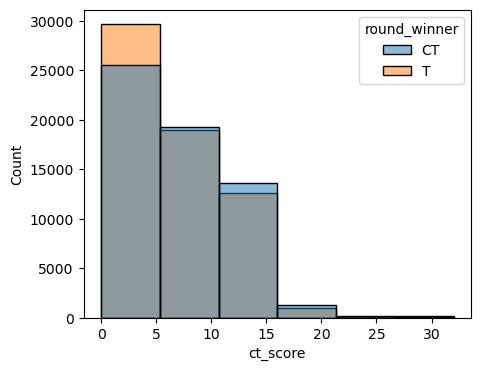

In [43]:
plt.figure(figsize=(5,4))
sns.histplot(x=df["ct_score"], bins = 6, hue=df["round_winner"])
plt.show()

**If the ct_score is <=5 at the time of snapshot, then the probability of T win is slightly higher**

### Feature: t_score
**Current score for Terrorism team**

In [46]:
df["t_score"].describe()

count    122410.000000
mean          6.780435
std           4.823543
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          33.000000
Name: t_score, dtype: float64

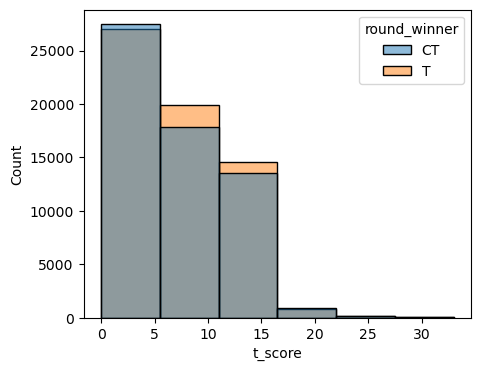

In [47]:
plt.figure(figsize=(5,4))
sns.histplot(x=df["t_score"], bins = 6, hue=df["round_winner"])
plt.show()

### Feature: Map
**The current map**

In [49]:
df["map"].describe()

count         122410
unique             8
top       de_inferno
freq           23811
Name: map, dtype: object

In [50]:
df["map"].value_counts()

map
de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: count, dtype: int64

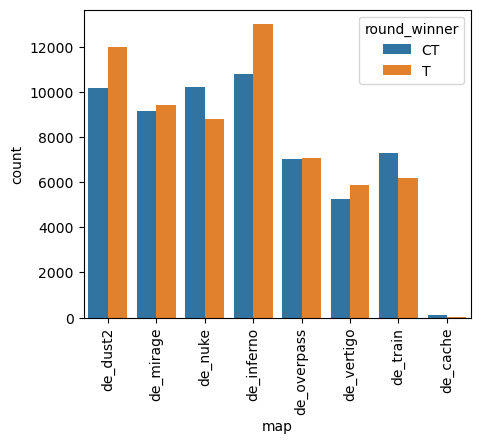

In [51]:
plt.figure(figsize=(5,4))
sns.countplot(x=df["map"], hue=df["round_winner"])
plt.xticks(rotation=90)
plt.show()

**Inferno is the most popular map followed by dust2 and in both these maps, the T team has a higher winning rate**

### Feature: bomb_planted
**Whether the bomb has been planted or not**

In [54]:
count = df["bomb_planted"].value_counts()

In [55]:
count

bomb_planted
False    108726
True      13684
Name: count, dtype: int64

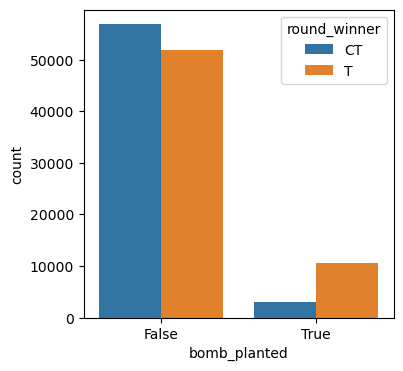

In [56]:
plt.figure(figsize=(4,4))
sns.countplot(x="bomb_planted", hue="round_winner", data=df)
plt.show()

In [57]:
grp_by = df.groupby(["bomb_planted", "round_winner"]).agg(count_of_winner= ("round_winner", "count")).reset_index()

In [58]:
grp_by

,bomb_planted,round_winner,count_of_winner
0,False,CT,56904
1,False,T,51822
2,True,CT,3100
3,True,T,10584


In [59]:
count_df = df.groupby("bomb_planted").agg(f_or_t_count = ("round_winner", "count")).reset_index()

In [60]:
count_df

,bomb_planted,f_or_t_count
0,False,108726
1,True,13684


In [61]:
merge_df = grp_by.merge(count_df, how="left", on="bomb_planted")

In [62]:
merge_df

,bomb_planted,round_winner,count_of_winner,f_or_t_count
0,False,CT,56904,108726
1,False,T,51822,108726
2,True,CT,3100,13684
3,True,T,10584,13684


In [63]:
merge_df["Percentage_win"] = (merge_df["count_of_winner"]/merge_df["f_or_t_count"])*100

In [64]:
merge_df

,bomb_planted,round_winner,count_of_winner,f_or_t_count,Percentage_win
0,False,CT,56904,108726,52.337067
1,False,T,51822,108726,47.662933
2,True,CT,3100,13684,22.654195
3,True,T,10584,13684,77.345805


**When the bomb is planted the T team wins 77% of the time and the CT team wins only 22.6%. However, when the bomb is not planted, the results are almost equal, with the CT team having a minor advantage over the T team**

#### Feature: ct_armor
**Total armour of all CT players**

In [67]:
df["ct_armor"].describe()

count    122410.000000
mean        314.142121
std         171.029736
min           0.000000
25%         194.000000
50%         377.000000
75%         486.000000
max         500.000000
Name: ct_armor, dtype: float64

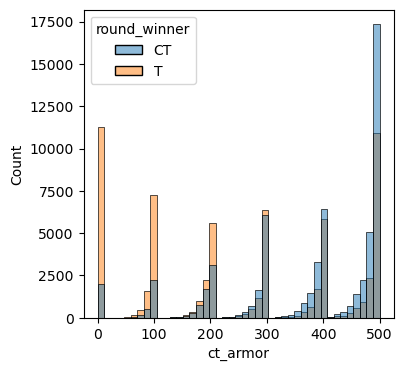

In [68]:
plt.figure(figsize=(4,4))
sns.histplot(x=df["ct_armor"], hue=df["round_winner"])
plt.show()

#### Feature: T_armor
**Total armor of all T players**

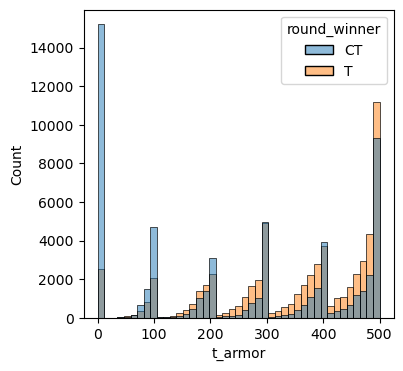

In [70]:
plt.figure(figsize=(4,4))
sns.histplot(x=df["t_armor"], hue=df["round_winner"])
plt.show()

#### Feature: ct_money
**Total money of all CT players**

In [72]:
df["ct_money"].describe()

count    122410.000000
mean       9789.023773
std       11215.042286
min           0.000000
25%        1300.000000
50%        5500.000000
75%       14600.000000
max       80000.000000
Name: ct_money, dtype: float64

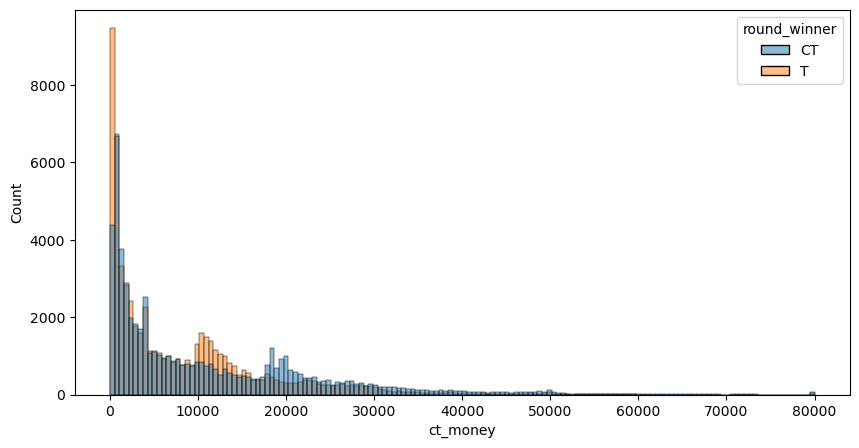

In [73]:
plt.figure(figsize=(10,5))
sns.histplot(x=df["ct_money"], hue=df["round_winner"])
plt.show()

#### Feature: t_money
**Total money of all T players**

In [75]:
df["t_money"].describe()

count    122410.000000
mean      11241.036680
std       12162.806759
min           0.000000
25%        1550.000000
50%        7150.000000
75%       18000.000000
max       80000.000000
Name: t_money, dtype: float64

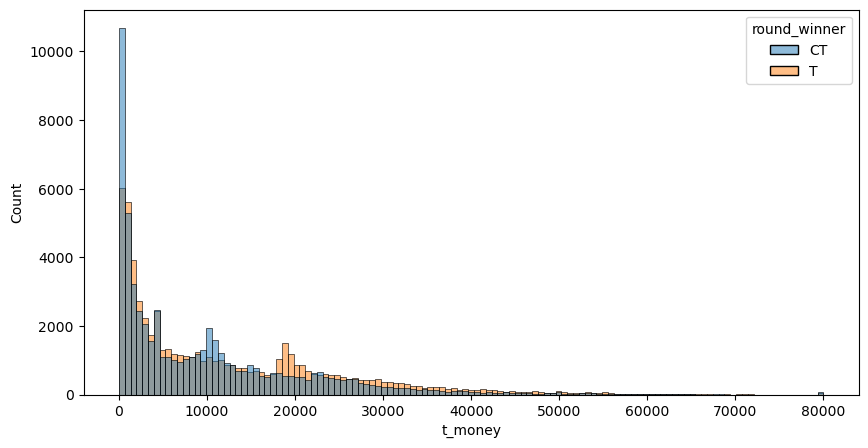

In [76]:
plt.figure(figsize=(10,5))
sns.histplot(x=df["t_money"], hue=df["round_winner"])
plt.show()

### Feature: ct_defuse_kits
**Number of diffused kits on CT**

In [78]:
df["ct_defuse_kits"].value_counts()

ct_defuse_kits
0.0    42095
1.0    27400
2.0    17218
3.0    15386
4.0    12013
5.0     8298
Name: count, dtype: int64

In [79]:
df["ct_defuse_kits"].describe()

count    122410.000000
mean          1.613724
std           1.605780
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           5.000000
Name: ct_defuse_kits, dtype: float64

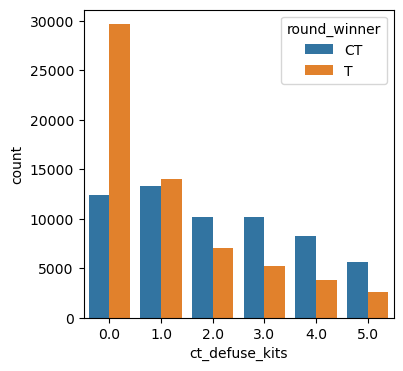

In [80]:
plt.figure(figsize=(4,4))
sns.countplot(x=df["ct_defuse_kits"], hue=df["round_winner"])
plt.show()

**As expected with no defuse kits, the T team will likely have a stroll. More the number of kits, the higher the probability of CT winning**

## Analysis of weapons used by CT and T teams

In [83]:
df_weap = df.iloc[:, 16:78]  #Dataframe with only weapons columns

In [84]:
df_weap.head()

,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,...,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [85]:
ct_weap = df_weap.iloc[:,::2]   #Dataframe with only weapons columns just for CT

In [86]:
ct_weap.head()

,ct_weapon_ak47,ct_weapon_aug,ct_weapon_awp,t_weapon_bizon,t_weapon_cz75auto,t_weapon_elite,t_weapon_famas,ct_weapon_galilar,ct_weapon_glock,ct_weapon_m249,...,ct_weapon_sg553,ct_weapon_ssg08,ct_weapon_ump45,ct_weapon_xm1014,ct_weapon_deagle,ct_weapon_fiveseven,ct_weapon_usps,ct_weapon_p250,ct_weapon_p2000,ct_weapon_tec9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0


In [87]:
t_weap = df_weap.iloc[:, 1::2]   #Dataframe with only weapons columns just for T

In [88]:
t_weap.head()

,t_weapon_ak47,t_weapon_aug,t_weapon_awp,ct_weapon_cz75auto,ct_weapon_elite,ct_weapon_famas,t_weapon_g3sg1,t_weapon_galilar,t_weapon_glock,ct_weapon_m4a1s,...,t_weapon_sg553,t_weapon_ssg08,t_weapon_ump45,t_weapon_xm1014,t_weapon_deagle,t_weapon_fiveseven,t_weapon_usps,t_weapon_p250,t_weapon_p2000,t_weapon_tec9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
ct_weap_col = ct_weap.columns

In [90]:
ct_weap_col # List of columns in ct_weap dataframe

Index(['ct_weapon_ak47', 'ct_weapon_aug', 'ct_weapon_awp', 't_weapon_bizon',
       't_weapon_cz75auto', 't_weapon_elite', 't_weapon_famas',
       'ct_weapon_galilar', 'ct_weapon_glock', 'ct_weapon_m249',
       't_weapon_m4a1s', 't_weapon_m4a4', 't_weapon_mac10', 't_weapon_mag7',
       't_weapon_mp5sd', 't_weapon_mp7', 't_weapon_mp9', 'ct_weapon_nova',
       'ct_weapon_p90', 't_weapon_r8revolver', 'ct_weapon_scar20',
       'ct_weapon_sg553', 'ct_weapon_ssg08', 'ct_weapon_ump45',
       'ct_weapon_xm1014', 'ct_weapon_deagle', 'ct_weapon_fiveseven',
       'ct_weapon_usps', 'ct_weapon_p250', 'ct_weapon_p2000',
       'ct_weapon_tec9'],
      dtype='object')

In [91]:
total_weap = []
for col in ct_weap.columns:
    total_weap.append(ct_weap[col].sum())

In [92]:
total_weap     # count of each weapon used by CT team

[33614.0,
 16478.0,
 70226.0,
 10.0,
 12982.0,
 217.0,
 580.0,
 1352.0,
 847.0,
 1.0,
 334.0,
 6455.0,
 13136.0,
 6.0,
 337.0,
 239.0,
 691.0,
 120.0,
 20.0,
 7.0,
 88.0,
 29274.0,
 7284.0,
 5683.0,
 925.0,
 53943.0,
 7559.0,
 389238.0,
 29008.0,
 21305.0,
 994.0]

In [93]:
dict_ct_weap = dict(zip(ct_weap_col, total_weap))  #Zipping the weapons and their counts into dictionary

In [94]:
dict_ct_weap

{'ct_weapon_ak47': 33614.0,
 'ct_weapon_aug': 16478.0,
 'ct_weapon_awp': 70226.0,
 't_weapon_bizon': 10.0,
 't_weapon_cz75auto': 12982.0,
 't_weapon_elite': 217.0,
 't_weapon_famas': 580.0,
 'ct_weapon_galilar': 1352.0,
 'ct_weapon_glock': 847.0,
 'ct_weapon_m249': 1.0,
 't_weapon_m4a1s': 334.0,
 't_weapon_m4a4': 6455.0,
 't_weapon_mac10': 13136.0,
 't_weapon_mag7': 6.0,
 't_weapon_mp5sd': 337.0,
 't_weapon_mp7': 239.0,
 't_weapon_mp9': 691.0,
 'ct_weapon_nova': 120.0,
 'ct_weapon_p90': 20.0,
 't_weapon_r8revolver': 7.0,
 'ct_weapon_scar20': 88.0,
 'ct_weapon_sg553': 29274.0,
 'ct_weapon_ssg08': 7284.0,
 'ct_weapon_ump45': 5683.0,
 'ct_weapon_xm1014': 925.0,
 'ct_weapon_deagle': 53943.0,
 'ct_weapon_fiveseven': 7559.0,
 'ct_weapon_usps': 389238.0,
 'ct_weapon_p250': 29008.0,
 'ct_weapon_p2000': 21305.0,
 'ct_weapon_tec9': 994.0}

In [95]:
df_ct_weap = pd.DataFrame(list(dict_ct_weap.items()), columns=["weapon", "count"]) # Converting dictionary into Dataframe

In [96]:
df_ct_weap

,weapon,count
0,ct_weapon_ak47,33614.0
1,ct_weapon_aug,16478.0
2,ct_weapon_awp,70226.0
3,t_weapon_bizon,10.0
4,t_weapon_cz75auto,12982.0
5,t_weapon_elite,217.0
6,t_weapon_famas,580.0
7,ct_weapon_galilar,1352.0
8,ct_weapon_glock,847.0
9,ct_weapon_m249,1.0


In [97]:
df_ct_weap["total_count"] = df_ct_weap["count"].sum()  #Adding total_count column that sums up the count column

In [98]:
df_ct_weap

,weapon,count,total_count
0,ct_weapon_ak47,33614.0,702953.0
1,ct_weapon_aug,16478.0,702953.0
2,ct_weapon_awp,70226.0,702953.0
3,t_weapon_bizon,10.0,702953.0
4,t_weapon_cz75auto,12982.0,702953.0
5,t_weapon_elite,217.0,702953.0
6,t_weapon_famas,580.0,702953.0
7,ct_weapon_galilar,1352.0,702953.0
8,ct_weapon_glock,847.0,702953.0
9,ct_weapon_m249,1.0,702953.0


In [99]:
df_ct_weap["percent_count"] = df_ct_weap["count"]/df_ct_weap["total_count"]*100  #Weapons used by CT percentage wise

In [100]:
df_ct_weap

,weapon,count,total_count,percent_count
0,ct_weapon_ak47,33614.0,702953.0,4.781828
1,ct_weapon_aug,16478.0,702953.0,2.344111
2,ct_weapon_awp,70226.0,702953.0,9.990142
3,t_weapon_bizon,10.0,702953.0,0.001423
4,t_weapon_cz75auto,12982.0,702953.0,1.846781
5,t_weapon_elite,217.0,702953.0,0.030870
6,t_weapon_famas,580.0,702953.0,0.082509
7,ct_weapon_galilar,1352.0,702953.0,0.192331
8,ct_weapon_glock,847.0,702953.0,0.120492
9,ct_weapon_m249,1.0,702953.0,0.000142


In [101]:
df_ct_weap = df_ct_weap.sort_values('percent_count', ascending=False) #Sorting the dataframe in descending order

In [102]:
df_ct_weap.reset_index(inplace=True) #Resetting the index

In [103]:
df_ct_weap.columns

Index(['index', 'weapon', 'count', 'total_count', 'percent_count'], dtype='object')

In [104]:
del df_ct_weap["index"]  #Deleting the extra 'index' column

In [105]:
df_ct_weap

,weapon,count,total_count,percent_count
0,ct_weapon_usps,389238.0,702953.0,55.371839
1,ct_weapon_awp,70226.0,702953.0,9.990142
2,ct_weapon_deagle,53943.0,702953.0,7.673771
3,ct_weapon_ak47,33614.0,702953.0,4.781828
4,ct_weapon_sg553,29274.0,702953.0,4.164432
5,ct_weapon_p250,29008.0,702953.0,4.126592
6,ct_weapon_p2000,21305.0,702953.0,3.030786
7,ct_weapon_aug,16478.0,702953.0,2.344111
8,t_weapon_mac10,13136.0,702953.0,1.868688
9,t_weapon_cz75auto,12982.0,702953.0,1.846781


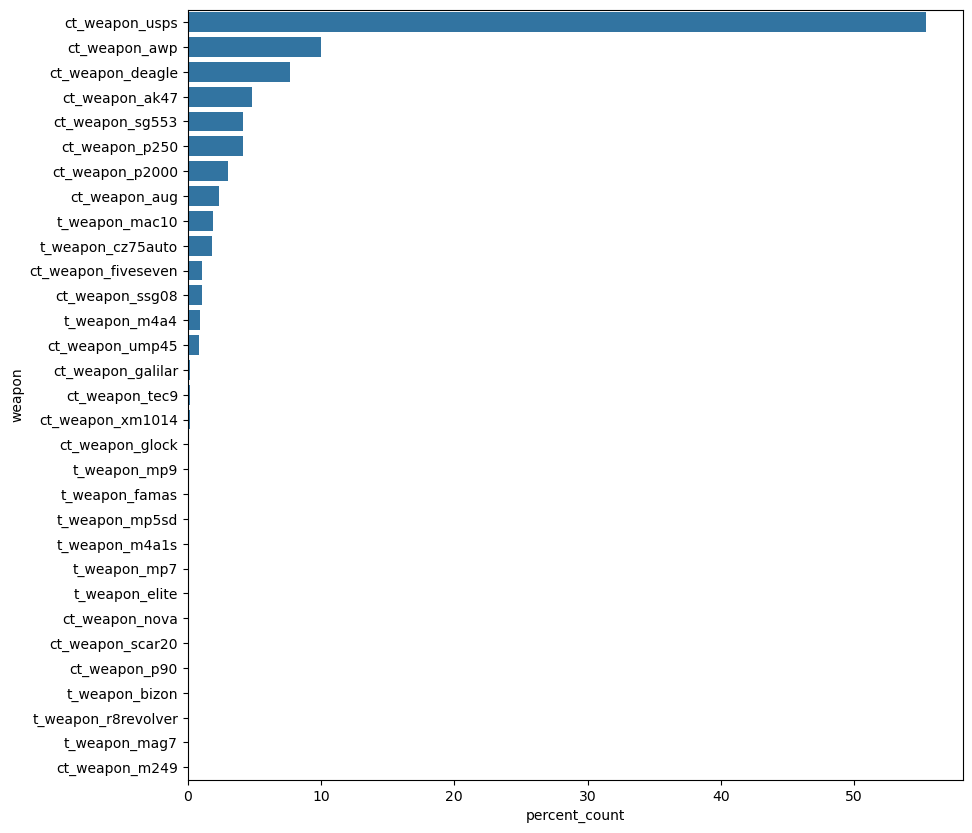

In [106]:
#Plotting the visual
plt.figure(figsize=(10,10))
sns.barplot(y="weapon", x="percent_count", data=df_ct_weap)
plt.show()

**usps is a pistol used in the beginning rounds and when there aren't enough funds available. Let's plot the graph by excluding the usps weapon**

In [108]:
df_ct_weap_no_usps = df_ct_weap.iloc[1:,:].reset_index()

In [109]:
df_ct_weap_no_usps

,index,weapon,count,total_count,percent_count
0,1,ct_weapon_awp,70226.0,702953.0,9.990142
1,2,ct_weapon_deagle,53943.0,702953.0,7.673771
2,3,ct_weapon_ak47,33614.0,702953.0,4.781828
3,4,ct_weapon_sg553,29274.0,702953.0,4.164432
4,5,ct_weapon_p250,29008.0,702953.0,4.126592
5,6,ct_weapon_p2000,21305.0,702953.0,3.030786
6,7,ct_weapon_aug,16478.0,702953.0,2.344111
7,8,t_weapon_mac10,13136.0,702953.0,1.868688
8,9,t_weapon_cz75auto,12982.0,702953.0,1.846781
9,10,ct_weapon_fiveseven,7559.0,702953.0,1.075321


In [110]:
del df_ct_weap_no_usps["index"]

In [111]:
df_ct_weap_no_usps.head()

,weapon,count,total_count,percent_count
0,ct_weapon_awp,70226.0,702953.0,9.990142
1,ct_weapon_deagle,53943.0,702953.0,7.673771
2,ct_weapon_ak47,33614.0,702953.0,4.781828
3,ct_weapon_sg553,29274.0,702953.0,4.164432
4,ct_weapon_p250,29008.0,702953.0,4.126592


In [112]:
df_ct_weap_no_usps["total_count"] = df_ct_weap_no_usps["count"].sum()
df_ct_weap_no_usps["percent_count"] = df_ct_weap_no_usps["count"]/df_ct_weap_no_usps["total_count"]*100

In [113]:
df_ct_weap_no_usps.head()

,weapon,count,total_count,percent_count
0,ct_weapon_awp,70226.0,313715.0,22.385286
1,ct_weapon_deagle,53943.0,313715.0,17.194906
2,ct_weapon_ak47,33614.0,313715.0,10.714821
3,ct_weapon_sg553,29274.0,313715.0,9.331400
4,ct_weapon_p250,29008.0,313715.0,9.246609


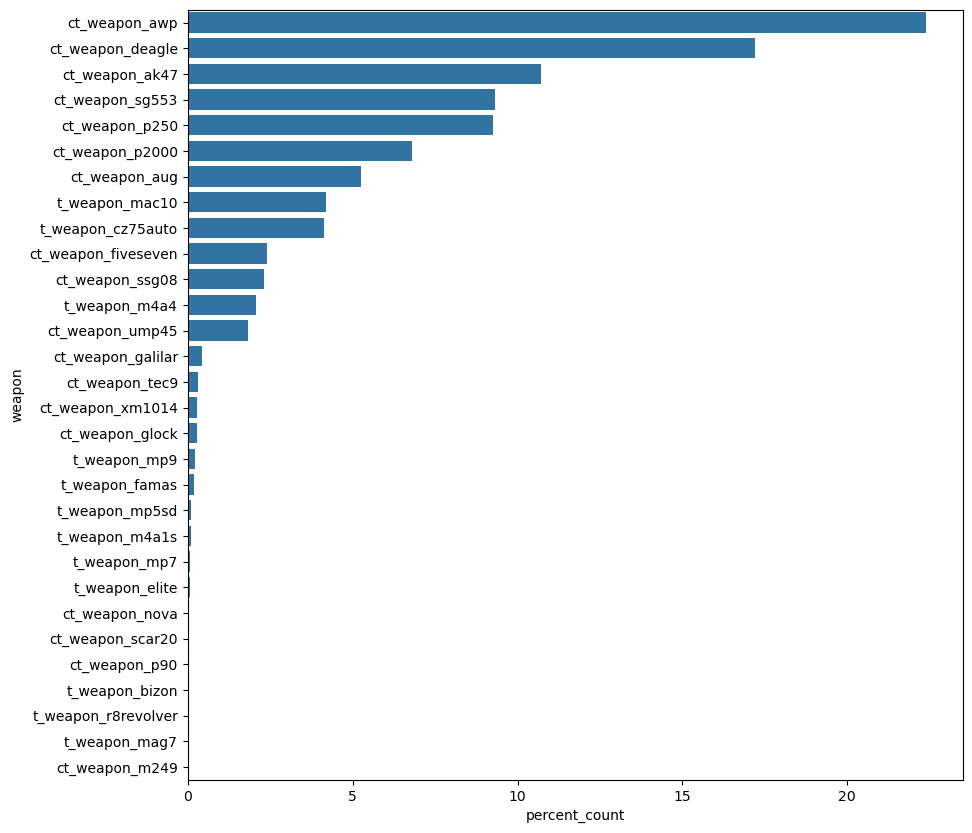

In [114]:
plt.figure(figsize=(10,10))
sns.barplot(y="weapon", x="percent_count", data=df_ct_weap_no_usps)
plt.show()

**Now, let us plot the graph for the T team**

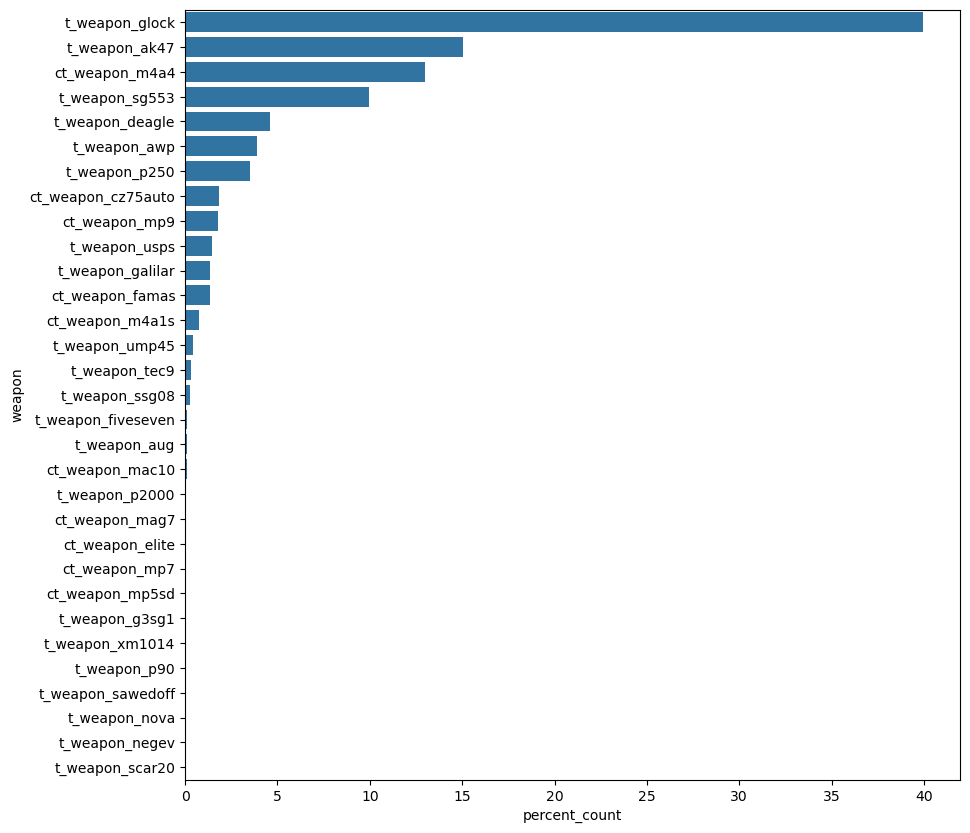

In [116]:
# List of all the columns in t_weap df
t_weap_col = t_weap.columns

# Creating a list of count of all the weapons used by T team
total_weap_t = []
for col in t_weap.columns:
    total_weap_t.append(t_weap[col].sum())

# Zipping the above two lists into a dictionary
dict_t_weap = dict(zip(t_weap_col, total_weap_t))

# Converting the dictionary into a dataframe
df_t_weap = pd.DataFrame(list(dict_t_weap.items()), columns=["weapon", "count"])

#Creating a column total_count to represent the sum of count column
df_t_weap["total_count"] = df_t_weap["count"].sum()

#Creating percent_count column to represent the percentage usage of each weapon
df_t_weap["percent_count"] = df_t_weap["count"]/df_t_weap["total_count"]*100

#Sorting the dataframe in descending order
df_t_weap = df_t_weap.sort_values('percent_count', ascending=False)

#Resetting the index
df_t_weap.reset_index(inplace=True)

#Deleting the extra index column
del df_t_weap["index"]

#Plotting the bar plot
plt.figure(figsize=(10,10))
sns.barplot(y="weapon", x="percent_count", data=df_t_weap)
plt.show()

**Glock is a pistol used in the beginning rounds when the teams don't have enough funds. So we will plot the bar without the glock weapon**

In [118]:
df_t_weap.head()

,weapon,count,total_count,percent_count
0,t_weapon_glock,405201.0,1013891.0,39.964947
1,t_weapon_ak47,152269.0,1013891.0,15.018281
2,ct_weapon_m4a4,131742.0,1013891.0,12.993704
3,t_weapon_sg553,100981.0,1013891.0,9.959749
4,t_weapon_deagle,46622.0,1013891.0,4.598325


In [119]:
df_t_weap_no_glock = df_t_weap.iloc[1:,:].reset_index()

In [120]:
df_t_weap_no_glock.head()

,index,weapon,count,total_count,percent_count
0,1,t_weapon_ak47,152269.0,1013891.0,15.018281
1,2,ct_weapon_m4a4,131742.0,1013891.0,12.993704
2,3,t_weapon_sg553,100981.0,1013891.0,9.959749
3,4,t_weapon_deagle,46622.0,1013891.0,4.598325
4,5,t_weapon_awp,39317.0,1013891.0,3.877833


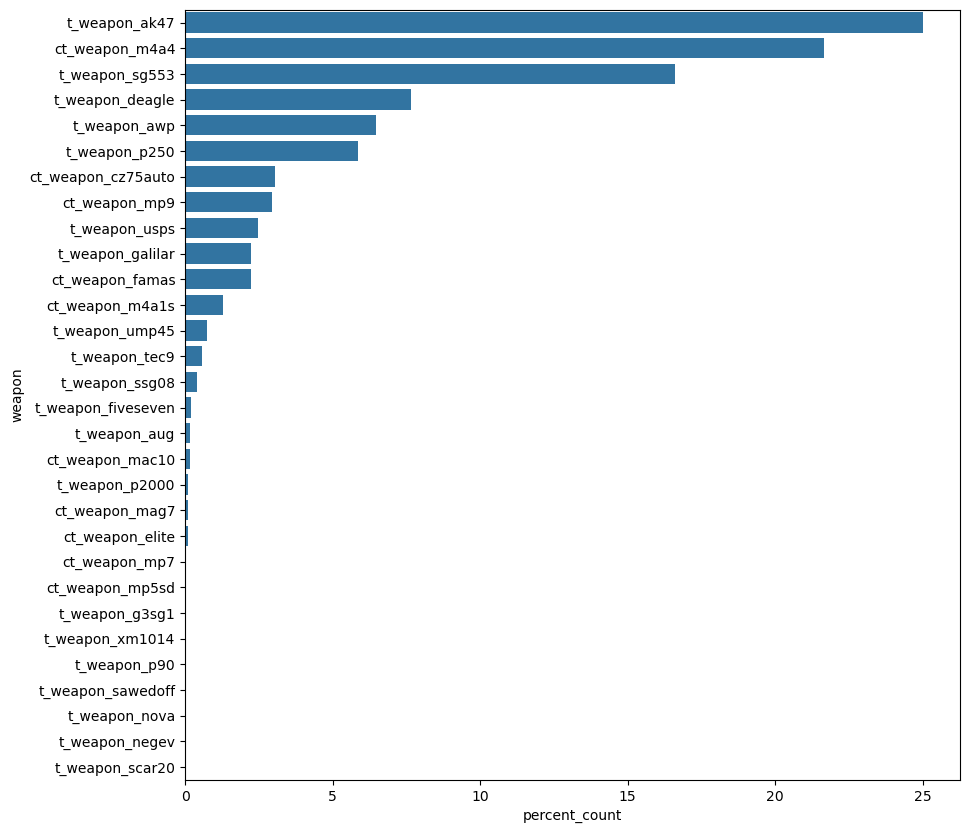

In [121]:
# Deleting the extra index column
del df_t_weap_no_glock["index"]

#Updating the total_count and percent_count columns
df_t_weap_no_glock["total_count"] = df_t_weap_no_glock["count"].sum()
df_t_weap_no_glock["percent_count"] = df_t_weap_no_glock["count"]/df_t_weap_no_glock["total_count"]*100

#Plotting the visual
plt.figure(figsize=(10,10))
sns.barplot(y="weapon", x="percent_count", data=df_t_weap_no_glock)
plt.show()

## Analysis of grenades used by CT and T team

In [123]:
df_gren = df.iloc[:, 78:90]

In [124]:
df_gren.head()

,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
df_gren.shape

(122410, 12)

In [126]:
gren_ct = df_gren.iloc[:, ::2]

In [127]:
gren_ct.head()

,ct_grenade_hegrenade,ct_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,ct_grenade_molotovgrenade,ct_grenade_decoygrenade
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


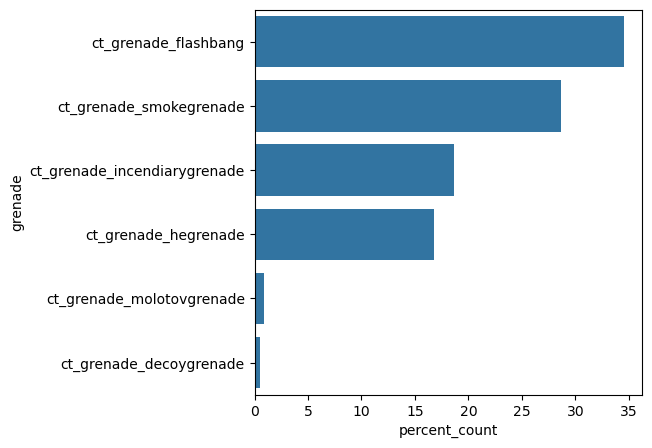

In [128]:
gren_ct_cols = gren_ct.columns
total_gren_ct = []
for col in gren_ct_cols:
    total_gren_ct.append(gren_ct[col].sum())
dict_gren_ct = dict(zip(gren_ct_cols, total_gren_ct))
df_gren_ct = pd.DataFrame(list(dict_gren_ct.items()), columns=["grenade", "count"])
df_gren_ct["total_count"] = df_gren_ct["count"].sum()
df_gren_ct["percent_count"] = df_gren_ct["count"]/df_gren_ct["total_count"]*100
df_gren_ct = df_gren_ct.sort_values("percent_count", ascending=False).reset_index()
del df_gren_ct["index"]

plt.figure(figsize=(5,5))
sns.barplot(x=df_gren_ct["percent_count"], y=df_gren_ct["grenade"])
plt.show()

In [129]:
df_gren_ct

,grenade,count,total_count,percent_count
0,ct_grenade_flashbang,226845.0,657433.0,34.504657
1,ct_grenade_smokegrenade,188611.0,657433.0,28.689007
2,ct_grenade_incendiarygrenade,122651.0,657433.0,18.656046
3,ct_grenade_hegrenade,110059.0,657433.0,16.740717
4,ct_grenade_molotovgrenade,5877.0,657433.0,0.893931
5,ct_grenade_decoygrenade,3390.0,657433.0,0.515642


**Similarly, we have to plot for the T team**

In [131]:
t_gren = df_gren.iloc[:, 1::2]

In [132]:
t_gren.head()

,t_grenade_hegrenade,t_grenade_flashbang,t_grenade_smokegrenade,t_grenade_incendiarygrenade,t_grenade_molotovgrenade,t_grenade_decoygrenade
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0
2,0.0,0.0,2.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


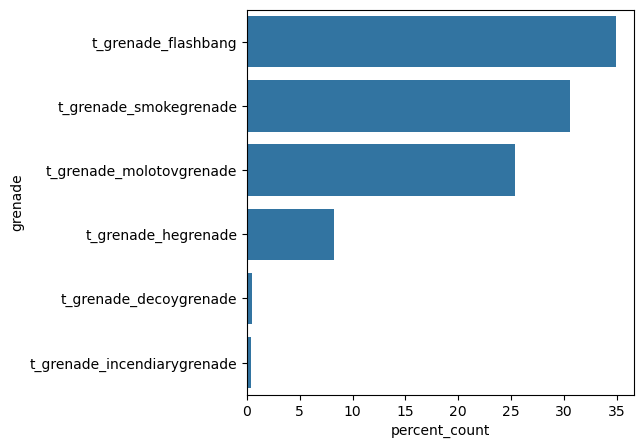

In [133]:
gren_t_cols = t_gren.columns
total_gren_t = []
for col in gren_t_cols:
    total_gren_t.append(t_gren[col].sum())
dict_gren_t = dict(zip(gren_t_cols, total_gren_t))
df_gren_t = pd.DataFrame(list(dict_gren_t.items()), columns=["grenade", "count"])
df_gren_t["total_count"] = df_gren_t["count"].sum()
df_gren_t["percent_count"] = df_gren_t["count"]/df_gren_t["total_count"]*100
df_gren_t = df_gren_t.sort_values("percent_count", ascending=False).reset_index()
del df_gren_t["index"]

plt.figure(figsize=(5,5))
sns.barplot(x=df_gren_t["percent_count"], y=df_gren_t["grenade"])
plt.show()

**Flashbang and smoke grenade are the two most popular grenades for both the T and CT teams**

## Encoding categorical features

In [136]:
cat_col = []
for col in df.columns:
    if (df[col].dtypes=="object") | (df[col].dtypes=="bool"):
        cat_col.append(col)

In [137]:
cat_col

['map', 'bomb_planted', 'round_winner']

In [138]:
from sklearn.preprocessing import LabelEncoder

In [139]:
encoder = LabelEncoder()

In [140]:
df["map"].unique()

array(['de_dust2', 'de_mirage', 'de_nuke', 'de_inferno', 'de_overpass',
       'de_vertigo', 'de_train', 'de_cache'], dtype=object)

In [141]:
encode_list = []
for col in cat_col:
    df[col] = encoder.fit_transform(df[col])
    encode_list.append(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

In [142]:
encode_list

[{'de_cache': 0,
  'de_dust2': 1,
  'de_inferno': 2,
  'de_mirage': 3,
  'de_nuke': 4,
  'de_overpass': 5,
  'de_train': 6,
  'de_vertigo': 7},
 {False: 0, True: 1},
 {'CT': 0, 'T': 1}]

## Train, Test, Split

In [144]:
X = df.drop("round_winner", axis=1)
y = df["round_winner"]

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [147]:
X_train.shape

(97928, 90)

In [148]:
X_test.shape

(24482, 90)

In [149]:
y_train.shape

(97928,)

In [150]:
y_test.shape

(24482,)

## Scaling the data

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## LDA

In [155]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [156]:
lda = LDA()

In [157]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [158]:
lda.transform(X_test)

array([[-0.31066701],
       [ 0.16160545],
       [-2.19522227],
       ...,
       [ 2.91456775],
       [-1.65102466],
       [ 0.99528168]])

In [159]:
lda_coefficients = np.exp(np.abs(lda.coef_))

In [160]:
lda_coefficients

array([[1.14051375, 1.02348232, 1.02361012, 1.08711166, 1.26443741,
        1.56896428, 1.42226149, 1.71174795, 1.72149378, 1.22695841,
        1.17629264, 1.02925519, 1.17393359, 1.01233178, 1.17701202,
        1.26888831, 1.21975251, 1.80580698, 1.22872837, 1.03124048,
        1.37208174, 1.26351299, 1.00130014, 1.00099319, 1.03406233,
        1.01079854, 1.01589366, 1.1511331 , 1.0481572 , 1.01891369,
        1.04559279, 1.13912974, 1.02386319, 1.01009894, 1.        ,
        1.10758456, 1.051198  , 1.62280372, 1.10928011, 1.01408145,
        1.11733322, 1.02306813, 1.00594113, 1.01383628, 1.04016588,
        1.00546389, 1.00296978, 1.1231047 , 1.0350133 , 1.00757676,
        1.02090408, 1.00405543, 1.0252188 , 1.01962772, 1.00493109,
        1.01827676, 1.00401758, 1.01179667, 1.24546089, 1.71649302,
        1.08595734, 1.01928052, 1.05378886, 1.0817296 , 1.0223457 ,
        1.00392739, 1.00787732, 1.06560713, 1.02458755, 1.02585421,
        1.07987292, 1.07637588, 1.03850144, 1.02

In [161]:
lda_coefficients.shape

(1, 90)

In [162]:
lda_coefficients = lda_coefficients.flatten()

In [163]:
lda_coefficients

array([1.14051375, 1.02348232, 1.02361012, 1.08711166, 1.26443741,
       1.56896428, 1.42226149, 1.71174795, 1.72149378, 1.22695841,
       1.17629264, 1.02925519, 1.17393359, 1.01233178, 1.17701202,
       1.26888831, 1.21975251, 1.80580698, 1.22872837, 1.03124048,
       1.37208174, 1.26351299, 1.00130014, 1.00099319, 1.03406233,
       1.01079854, 1.01589366, 1.1511331 , 1.0481572 , 1.01891369,
       1.04559279, 1.13912974, 1.02386319, 1.01009894, 1.        ,
       1.10758456, 1.051198  , 1.62280372, 1.10928011, 1.01408145,
       1.11733322, 1.02306813, 1.00594113, 1.01383628, 1.04016588,
       1.00546389, 1.00296978, 1.1231047 , 1.0350133 , 1.00757676,
       1.02090408, 1.00405543, 1.0252188 , 1.01962772, 1.00493109,
       1.01827676, 1.00401758, 1.01179667, 1.24546089, 1.71649302,
       1.08595734, 1.01928052, 1.05378886, 1.0817296 , 1.0223457 ,
       1.00392739, 1.00787732, 1.06560713, 1.02458755, 1.02585421,
       1.07987292, 1.07637588, 1.03850144, 1.02942838, 1.04618

In [164]:
lda_coefficients.shape

(90,)

In [165]:
feature_names = list(X.columns)

In [166]:
feature_names

['time_left',
 'ct_score',
 't_score',
 'map',
 'bomb_planted',
 'ct_health',
 't_health',
 'ct_armor',
 't_armor',
 'ct_money',
 't_money',
 'ct_helmets',
 't_helmets',
 'ct_defuse_kits',
 'ct_players_alive',
 't_players_alive',
 'ct_weapon_ak47',
 't_weapon_ak47',
 'ct_weapon_aug',
 't_weapon_aug',
 'ct_weapon_awp',
 't_weapon_awp',
 't_weapon_bizon',
 'ct_weapon_cz75auto',
 't_weapon_cz75auto',
 'ct_weapon_elite',
 't_weapon_elite',
 'ct_weapon_famas',
 't_weapon_famas',
 't_weapon_g3sg1',
 'ct_weapon_galilar',
 't_weapon_galilar',
 'ct_weapon_glock',
 't_weapon_glock',
 'ct_weapon_m249',
 'ct_weapon_m4a1s',
 't_weapon_m4a1s',
 'ct_weapon_m4a4',
 't_weapon_m4a4',
 'ct_weapon_mac10',
 't_weapon_mac10',
 'ct_weapon_mag7',
 't_weapon_mag7',
 'ct_weapon_mp5sd',
 't_weapon_mp5sd',
 'ct_weapon_mp7',
 't_weapon_mp7',
 'ct_weapon_mp9',
 't_weapon_mp9',
 't_weapon_negev',
 'ct_weapon_nova',
 't_weapon_nova',
 'ct_weapon_p90',
 't_weapon_p90',
 't_weapon_r8revolver',
 't_weapon_sawedoff',
 'c

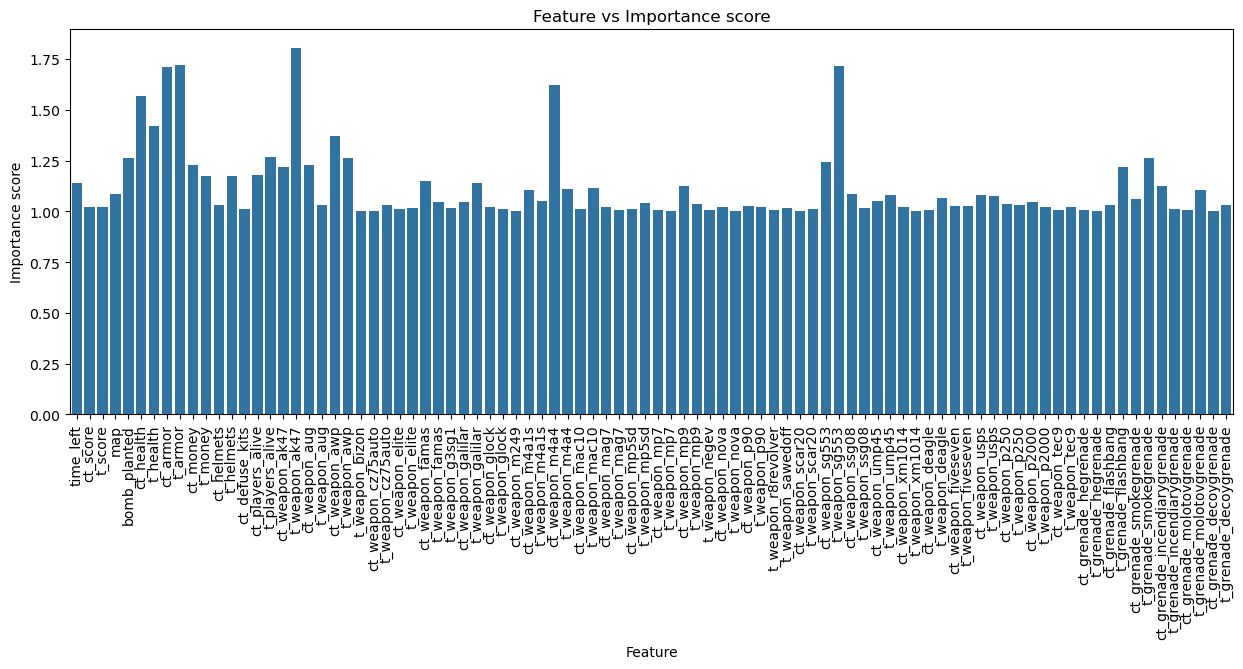

In [167]:
plt.figure(figsize=(15,5))
sns.barplot(x=feature_names, y=lda_coefficients)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance score")
plt.title("Feature vs Importance score")
plt.show()

In [168]:
df_feature_score = pd.DataFrame({"feature_names": feature_names, "importance_score": lda_coefficients})

In [169]:
df_feature_score.head()

,feature_names,importance_score
0,time_left,1.140514
1,ct_score,1.023482
2,t_score,1.023610
3,map,1.087112
4,bomb_planted,1.264437


In [170]:
top_20 = df_feature_score.nlargest(20, "importance_score") #Selecting the top 20 features by importance_score

In [171]:
top_20

,feature_names,importance_score
17,t_weapon_ak47,1.805807
8,t_armor,1.721494
59,t_weapon_sg553,1.716493
7,ct_armor,1.711748
37,ct_weapon_m4a4,1.622804
5,ct_health,1.568964
6,t_health,1.422261
20,ct_weapon_awp,1.372082
15,t_players_alive,1.268888
4,bomb_planted,1.264437


In [172]:
top_20.index

Index([17, 8, 59, 7, 37, 5, 6, 20, 15, 4, 83, 21, 58, 18, 9, 16, 81, 14, 10,
       12],
      dtype='int64')

In [173]:
X_train = X_train[:, [17, 8, 59, 7, 37, 5, 6, 20, 15, 4, 83, 21, 58, 18, 9, 16, 81, 14, 10,
       12]]
X_test = X_test[:, [17, 8, 59, 7, 37, 5, 6, 20, 15, 4, 83, 21, 58, 18, 9, 16, 81, 14, 10,
       12]]

## Implementing Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

Cross Validation Score: [0.74634943 0.74430716 0.75135301 0.74996171 0.75082972]
Mean Cross Validation Score: 0.7485602041399163

 Confusion matrix: 

[[9166 2838]
 [3240 9238]]




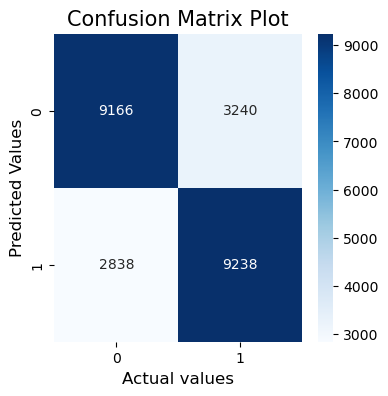


 Classification Report: 

              precision    recall  f1-score   support

           0       0.74      0.76      0.75     12004
           1       0.76      0.74      0.75     12478

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



In [317]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

lr_val = cross_val_score(lr,X_train, y_train, cv=5)
print("Cross Validation Score:", lr_val)
print(f"Mean Cross Validation Score: {np.mean(lr_val)}")

cm_lr = confusion_matrix(y_test, lr_pred)
print("\n Confusion matrix: \n")
print(cm_lr)
print("\n")

plt.figure(figsize=(4,4))
sns.heatmap(cm_lr.T, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Actual values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Confusion Matrix Plot", fontsize=15)
plt.show()

cl_lr = classification_report(y_test, lr_pred)
print("\n Classification Report: \n")
print(cl_lr)

## Implementing Decision Tree

In [178]:
from sklearn.tree import DecisionTreeClassifier

Cross Validation Score: [0.79842745 0.7976616  0.80087818 0.79336227 0.79749809]
Mean Cross Validation Score: 0.7975655147590351

 Confusion matrix: 

[[ 9720  2284]
 [ 2247 10231]]




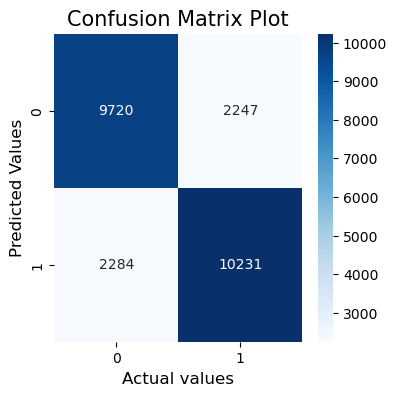


 Classification Report: 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     12004
           1       0.82      0.82      0.82     12478

    accuracy                           0.81     24482
   macro avg       0.81      0.81      0.81     24482
weighted avg       0.81      0.81      0.81     24482



In [319]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

dt_val = cross_val_score(dt,X_train, y_train, cv=5)
print("Cross Validation Score:", dt_val)
print(f"Mean Cross Validation Score: {np.mean(dt_val)}")

cm_dt = confusion_matrix(y_test, dt_pred)
print("\n Confusion matrix: \n")
print(cm_dt)
print("\n")

plt.figure(figsize=(4,4))
sns.heatmap(cm_dt.T, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Actual values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Confusion Matrix Plot", fontsize=15)
plt.show()

cl_dt = classification_report(y_test, dt_pred)
print("\n Classification Report: \n")
print(cl_dt)

## Implementing Random Forest

In [181]:
from sklearn.ensemble import RandomForestClassifier

Cross Validation Score: [0.84029409 0.84044726 0.84621669 0.84355374 0.84457493]
Mean Cross Validation Score: 0.8430173402294485

 Confusion matrix: 

[[10282  1722]
 [ 1782 10696]]




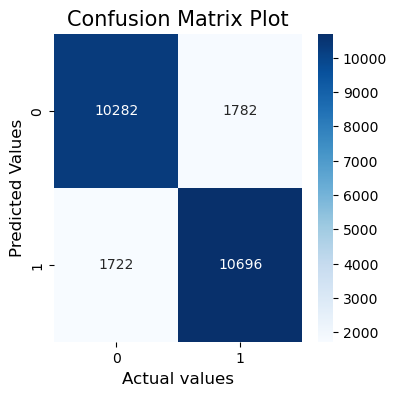


 Classification Report: 

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     12004
           1       0.86      0.86      0.86     12478

    accuracy                           0.86     24482
   macro avg       0.86      0.86      0.86     24482
weighted avg       0.86      0.86      0.86     24482



In [321]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

rf_val = cross_val_score(rf,X_train, y_train, cv=5)
print("Cross Validation Score:", rf_val)
print(f"Mean Cross Validation Score: {np.mean(rf_val)}")

cm_rf = confusion_matrix(y_test, rf_pred)
print("\n Confusion matrix: \n")
print(cm_rf)
print("\n")

plt.figure(figsize=(4,4))
sns.heatmap(cm_rf.T, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Actual values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Confusion Matrix Plot", fontsize=15)
plt.show()

cl_rf = classification_report(y_test, rf_pred)
print("\n Classification Report: \n")
print(cl_rf)

**Random Forest performs the best. However, it took 112 seconds to run. Hence, this model is not suitable for real-time implementation. The decision tree model underperforms by 5% but gives the output in 20 seconds. This is more suitable for real-time implementation.**